## ADEDAYO ADEGOKE - Bivariate Data Exploration Project Portfolio

#### Using whatever statistics, tables or visualisations you feel are most appropriate in each case,
investigate:

5. The statistics and distribution of the numerical time against one of the categorical
variables that has a significant effect on the ship processing time.

6. The correlation of the numerical time against the other numerical variables.
Comment on the correlations.
Present, and comment upon, a scatterplot of the duration of the time against
the variable that has the strongest positive correlation with time.

7. The cross-tabulation of category onSchedule against the category origin.

#### Also show, and comment on, the dependence using appropriate stacked or grouped
bar charts.

### Data cleansing and wrangling

Various methods have been used historically for missing values imputation. Dadi, K et al. (2021) used mean for imputation as it maintains the column's overall distribution and it is widely used. Therefore missing values for Gear and Wind shall be replaced their mean.

In [1]:
# Loading necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics as stat

# Load the data
ports_replacemissing = pd.read_csv("ports.csv")

# Display the first few rows of the DataFrame to understand its structure
print(ports_replacemissing.shape)
ports_replacemissing.head()

(1006, 13)


,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7mm,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3mm,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


Dataset after replacing missing values with their mean:

In [2]:
# replace missing values with mean for each numeric column
for col in ports_replacemissing.select_dtypes(include=['float64', 'int64']):
    ports_replacemissing[col].fillna(ports_replacemissing[col].mean(), inplace=True)

# Print the dataset after replacing missing values
print("\nDataset after replacing missing values with their mean:")
ports_replacemissing.head()


Dataset after replacing missing values with their mean:


,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7mm,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3mm,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


In [3]:
# Check for missing values in each column
missing_values = ports_replacemissing.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Remove rows with missing data
ports_replacemissing = ports_replacemissing.dropna()

# Print the shape of the DataFrame after removing rows with missing data
print("Shape of the dataset after removing rows with missing data:")
print(ports_replacemissing.shape)

Missing values in each column:
time          0
TEU           0
loadratio     0
gear          0
wind          0
rain          0
weather       0
onSchedule    0
labour        0
origin        0
delay         0
date          0
port          0
dtype: int64
Shape of the dataset after removing rows with missing data:
(1006, 13)


To identify and remove any duplicate rows from the DataFrame, I will:
Use the duplicated() method to identify any duplicate rows, marking them as True if they are duplicates. Use the drop_duplicates() method to remove the duplicate rows. I will then display the number of duplicate rows identified and removed.

In [4]:
# Identifying duplicate rows
duplicate_rows = ports_replacemissing.duplicated()
num_duplicates = duplicate_rows.sum()

# Displaying the number of duplicate rows
print(num_duplicates)

6


The dataset contains 6 duplicate rows. I will now remove these duplicates and confirm their removal.
Damodaram (2022) and Steorts (2023) emphasise the importance of removing duplicates in data management and analysis, highlighting its role in maintaining data integrity and quality.
The below code identifies and displays the number of duplicate rows in the 'ports' DataFrame.

In [5]:
# Removing duplicate rows
ports_replacemissing = ports_replacemissing.drop_duplicates()

# Verifying if duplicates are removed
remaining_duplicates = ports_replacemissing.duplicated().sum()

# Display the result
remaining_duplicates, ports_replacemissing.shape
print(remaining_duplicates, ports_replacemissing.shape)

0 (1000, 13)


I have successfully removed six duplicates rows from our dataset. As a result, the dataset now comprises 1000 rows and 13 columns.

### Convert the rain column from text to numerical format.

I will strip the "mm" from the values and convert the column to a float type.

In [6]:
# # Strip "mm" from the 'rain' column and convert to float
# ports_replacemissing['rain'] = ports_replacemissing['rain'].str.replace('mm', '').astype(float)

# # Display the modified data
# ports_replacemissing.head()

# Check if 'rain' column exists in the DataFrame, then strip "mm" and convert to float
if 'rain' in ports_replacemissing.columns:
    ports_replacemissing['rain'] = ports_replacemissing['rain'].str.replace('mm', '').astype(float)
else:
    print("The 'rain' column does not exist in the DataFrame.")

# Display the modified data
ports_replacemissing.head()

,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


The 'rain' column's "mm" values have been stripped, converting the data to a numerical type. It is crucial to format data appropriately for precise and efficient processing in data analysis. Take the 'rain' column as an example: changing values from a string format like "3.1mm" to a numerical one such as 3.1 is essential for quantitative analysis.
Using numerical data allows for various statistical calculations, such as computing averages, examining correlations, and performing regression analyses, which are complex with string data.

### Standardise the labour column to have consistent formatting.

I intend to unify the 'labour' column by substituting '0' with 'striking' and '1' with 'working', ensuring consistency throughout the column.

In [7]:
# Replace '0' with 'striking' and '1' with 'working' in the 'labour' column
ports_replacemissing['labour'] = ports_replacemissing['labour'].replace({'0': 'striking', '1': 'working'})

# Display the modified data
ports_replacemissing.head()

,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7,disruptive,Yes,working,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3,disruptive,Yes,working,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


I have made the 'labour' column consistent by replacing '0' with 'striking' and '1' with 'working'. This standardisation of categorical data, demonstrated by the transformation of '0' and '1' to 'striking' and 'working', enhances clarity and uniformity in the dataset. It not only aids in category-based analysis but also improves the readability of the data.
This process of data cleaning and standardisation is crucial, as emphasised by Steorts (2023) in "A Primer on the Data Cleaning Pipeline" and Zacks, Kenett, and Gedeck (2023) in "Modern Statistics: A Computer-Based Approach with Python Solutions." These authors underline the importance of thorough data preparation for achieving accurate and insightful analysis, highlighting the fundamental role of data preprocessing in statistics.

### 5 - Statistics and distribution of the numerical time against one of the categorical variables

An initial exploratory analysis is necessary to analyse how categorical variables affect the numerical "time" variable, which represents ship processing time. This includes computing average times per category and performing statistical tests to determine if variations in means are significant. Key categorical variables such as "weather," "onSchedule," "labour," "origin," "delay," and "port" are considered for their potential impact on processing time.

Summary statistics and visual tools like boxplots will be used to discern disparities in processing time across different categories, indicating if deeper statistical evaluation is justified. The process involves calculating the mean, median, and standard deviation of "time" for each categorical variable and creating boxplots to observe distributions, outliers, and notable differences.

In [8]:
# Calculate summary statistics of "time" for each categorical variable
summary_stats = {}
categorical_variables = ['weather', 'onSchedule', 'labour', 'origin', 'delay', 'port']

for cat in categorical_variables:
    summary_stats[cat] = ports_replacemissing.groupby(cat)['time'].describe()

print(summary_stats)

{'weather':             count        mean        std   min      25%    50%      75%    max
weather                                                                       
disruptive  244.0  265.098361  96.351432  70.7  191.100  256.8  335.175  568.5
normal      756.0  234.680556  80.083582  49.4  175.275  225.9  284.875  582.0, 'onSchedule':             count        mean        std    min      25%     50%      75%  \
onSchedule                                                                  
No          374.0  272.055080  82.734829  114.0  208.375  263.65  327.325   
Yes         626.0  224.207508  81.775154   49.4  164.450  210.80  272.875   

              max  
onSchedule         
No          582.0  
Yes         495.7  , 'labour':           count        mean        std    min     25%    50%    75%    max
labour                                                                    
striking   47.0  278.644681  88.370834  127.4  210.85  271.9  348.1  463.1
working   953.0  240.300315  84.

The provided summary statistics suggest that 'weather' impacts port time, with 'disruptive' conditions leading to a slightly higher mean(265) time than 'normal' conditions (234). The 'onSchedule' variable shows a more pronounced difference, where not being on schedule is associated with an increased mean port time. Under 'labour', 'striking' has a higher mean time than 'working', consistent with the expectation that strikes affect operational efficiency. For 'origin', 'Intercontinental' ships have the highest mean time, possibly due to longer journey times or more complex cargo handling.

There's a distinct difference in mean time between ships that experienced 'delays' and those that did not, with delays increasing the average time spent at port. The 'port' data, focused solely on 'Abermouth', presents an average time within a broad range, indicating varied port time, even within a single location. These figures highlight the influence of external and operational factors on port efficiency, with the potential for deeper investigation into the causes of these variations.

Next, I will be considering the statistics and distribution of the numerical time against one of the categorical variables that has a significant effect on the ship processing time.

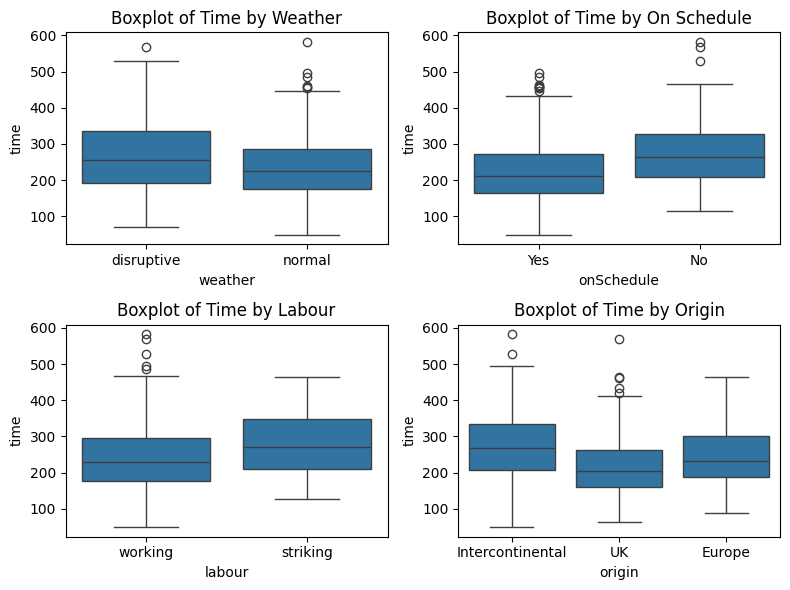

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Boxplot for 'weather'
sns.boxplot(x='weather', y='time', data=ports_replacemissing, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Time by Weather')

# Boxplot for 'onSchedule'
sns.boxplot(x='onSchedule', y='time', data=ports_replacemissing, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Time by On Schedule')

# Boxplot for 'labour'
sns.boxplot(x='labour', y='time', data=ports_replacemissing, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Time by Labour')

# Boxplot for 'origin'
sns.boxplot(x='origin', y='time', data=ports_replacemissing, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Time by Origin')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Here are the boxplots visualising the distribution of ship processing time ("time") across different levels of the four categorical variables: "weather," "onSchedule," "labour," and "origin."

The boxplots scrutinise processing times against various categories, hinting at underlying trends. In the 'Weather' category, 'normal' conditions exhibit more outliers, with processing times stretching into the extremes, challenging the assumption that 'disruptive' weather significantly elevates delay times.

Regarding 'onSchedule' status, while ships not on schedule show a broader range in processing times, the medians do not significantly differ, evidenced by overlapping IQRs. This suggests that being on schedule does not necessarily guarantee faster processing, highlighting the role of other variables in port efficiency.

For 'Labour', outliers are primarily observed when labour is 'working', indicating that significant delays can occur even without strikes. However, the IQRs for 'working' and 'striking' are similar, suggesting a commonality in processing times across both labour conditions.

'Origin' analysis reveals that UK-originated processing times are shown to be the quickest. Intercontinental origins have the highest median times. Although outliers suggest sporadic delays across Intercontinental and the UK origins, with the absence of outliers in Europe, the considerable IQR overlap indicates a broad similarity in processing times regardless of origin.

R-squared values would further quantify the relationship between these categories and processing times. At the same time, the mean would offer an additional measure of central tendency, complementing the median to provide a fuller picture of typical processing times.

## 6 Correlation of the numerical time against the other numerical variables

To investigate the correlation between the numerical "time" variable and the other numerical variables in the dataset, I can calculate the Pearson correlation coefficient for each pair of numerical variables. The Pearson correlation coefficient is a measure of the linear correlation between two variables, and its value ranges from -1 to 1, where:

1 indicates a perfect positive linear relationship -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

The numerical variables in the dataset, based on the initial view, appear to be "TEU" (Twenty-Foot Equivalent Unit, a measure of cargo capacity), "loadratio" (which could indicate the ratio of cargo loaded), "gear" (which could be related to the equipment used for loading/unloading), "wind" (which may affect operations), and "rain" (which could indicate weather conditions).

I will calculate the correlation matrix and then generate a heatmap to visualize these correlations. The heatmap will help seeing at a glance which variables have stronger or weaker relationships with "time."

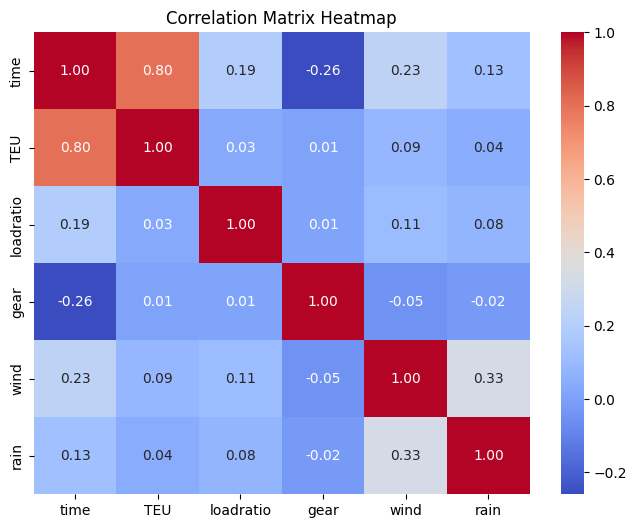

In [10]:
# Calculate the correlation matrix including only numerical variables
numerical_variables = ['time', 'TEU', 'loadratio', 'gear', 'wind', 'rain']
correlation_matrix = ports_replacemissing[numerical_variables].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap above displays the Pearson correlation coefficients between the numerical variables in the dataset, including "time." Here are some observations:

The heatmap displays correlations between several numerical variables. A notable strong positive correlation (0.80) exists between 'time' and 'TEU', suggesting that the time spent in port increases as cargo capacity increases. This is expected as larger TEUs likely require more handling time.

Other variables show much weaker correlations with 'time'. 'Loadratio' has a slight positive correlation (0.19), indicating a very modest relationship to time, potentially suggesting that higher load ratios marginally increase processing time. 'Gear' has a weak negative correlation with 'time' (-0.26), which could reflect specific gear configurations associated with decreased processing times, but the correlation is not strong enough to make definitive statements.

'Wind' and 'rain' show very weak positive correlations with 'time' (0.23 and 0.13, respectively), hinting that adverse weather conditions might slightly increase processing times, but again, the relationships are not robust.

The correlation values for 'wind' with 'rain' (0.33) suggest a moderate relationship, which is plausible as they are both weather-related variables. However, all other correlations between variables are weak, indicating no linear solid relationships. It is important to note that correlation does not imply causation, and these relationships would benefit from further investigation to understand the underlying causal factors.

Still on 6, I will present, and comment upon, a scatterplot of the duration of the time against the variable that has the strongest positive correlation with time.

In [11]:
# Isolating numeric columns for correlation calculation
numeric_data = ports_replacemissing.select_dtypes(include=[int, float])

# Calculating correlation coefficients with respect to 'time' for numeric columns only
correlation_with_time_numeric = numeric_data.corr()['time']

# Dropping the correlation of 'time' with itself
correlation_with_time_numeric = correlation_with_time_numeric.drop(labels=['time'])

# Finding the variable with the strongest positive correlation
strongest_correlation_variable_numeric = correlation_with_time_numeric.idxmax()
strongest_correlation_value_numeric = correlation_with_time_numeric.max()

print(strongest_correlation_variable_numeric, strongest_correlation_value_numeric)

TEU 0.8005845757536578


The variable with the strongest positive correlation with time is TEU (Twenty-foot Equivalent Unit, a measure used for cargo capacity), with a correlation coefficient of approximately 0.80. This indicates a strong positive relationship between time and TEU.

Next, I will plot a scatterplot of the duration of the time against the TEU variable which has the strongest positive correlation with time (TEU 0.8005845757536578).

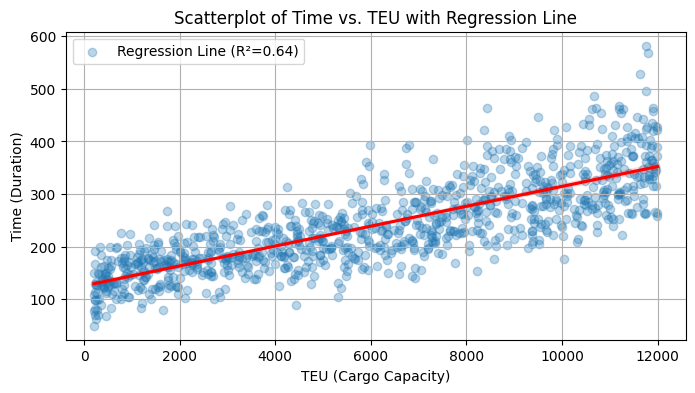

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ports_replacemissing is my DataFrame and it contains 'TEU' and 'time' columns

# I prepare data for regression model
X = ports_replacemissing['TEU']
y = ports_replacemissing['time']
X = sm.add_constant(X)  # Add a constant to the model

# Fit the regression model
model = sm.OLS(y, X).fit()

# Calculate R-squared value
r_squared = model.rsquared

# Creating a scatterplot of 'time' against 'TEU' with a red regression line
plt.figure(figsize=(8, 4))
sns.regplot(
    x='TEU', 
    y='time', 
    data=ports_replacemissing, 
    scatter_kws={'alpha':0.3}, 
    line_kws={'color': 'red'}
)

# Adding title, labels and grid
plt.title('Scatterplot of Time vs. TEU with Regression Line')
plt.xlabel('TEU (Cargo Capacity)')
plt.ylabel('Time (Duration)')
plt.grid(True)

# Adding a legend with R-squared value
plt.legend(['Regression Line (R²={:.2f})'.format(r_squared)])

# Show the plot
plt.show()

This code produces an interactive scatter plot where I can hover over points to see of the duration of the time against the TEU variable which has the strongest positive correlation with time.

In [ ]:
import plotly.express as px
import statsmodels.api as sm

# 'ports_replacemissing' is DataFrame and it contains 'TEU' and 'time' columns

# Fit the OLS model to get the R-squared value
X = ports_replacemissing['TEU']
y = ports_replacemissing['time']
X = sm.add_constant(X)  # Add a constant to the predictor variable
model = sm.OLS(y, X).fit()

# Create a scatter plot using Plotly
fig = px.scatter(
    ports_replacemissing, 
    x='TEU', 
    y='time', 
    title='Scatterplot of Time vs. TEU with Regression Line',
    labels={'TEU': 'TEU (Cargo Capacity)', 'time': 'Time (Duration)'}
)

# Get the regression line values
regression_line = model.predict(X)

# Add the regression line as a separate trace
fig.add_scatter(x=ports_replacemissing['TEU'], y=regression_line, mode='lines', name='Regression Line', line=dict(color='red'))

# Update traces to change the marker style
fig.update_traces(marker=dict(size=8, opacity=0.5))

# Update layout to add R-squared value to the title
r_squared = model.rsquared
fig.update_layout(title=f'Scatterplot of Time vs. TEU with Regression Line (R-squared = {r_squared:.2f})')

# Show the plot
fig.show()

The scatter plot with a regression line in red, enhancing the visual contrast and focus on the trend indicated by the line.

The scatterplot with the regression line suggests a positive correlation between 'time' and 'TEU', indicating that as the cargo capacity (TEU) increases, there tends to be an increase in the time spent in port operations. The regression line in red clearly shows this upward trend. The plot also exhibits a degree of variability in 'time' for given 'TEU' values, as evidenced by the spread of data points around the regression line, with an R-squared value that quantifies this relationship. Some points lie at a considerable distance from the fitted line, which are outliers.

These outliers represent instances where the time taken is much higher or lower than expected based on the general trend, and they could be due to exceptional circumstances or data recording errors. The density of points near the regression line indicates that while there is a clear positive relationship, varying factors also affect the time, leading to the observed variability. These could include port operations' efficiency, cargo type, and other operational variables not captured by 'TEU' alone. While TEU is a significant factor in predicting time spent in port, the outliers and variability suggest a more complex underlying relationship, which might be better understood with a more sophisticated model or by including additional relevant variables.

##  7 - Cross-tabulation of category onSchedule against the category origin.

Cross-tabulation is a method to analyse the relationship between two categorical variables quantitatively. It provides a primary picture of the interrelation between two variables and can help find their interactions.

For the "onschedule" and "origin" variables, I will create a cross-tabulation table to see how often each combination of categories occurs. Afterwards, I will visualise this relationship with a stacked or grouped bar chart, which will help identify the proportion of ships on schedule for each origin category.

I will start by creating the cross-tabulation table.

In [14]:
# Create a cross-tabulation table for 'onSchedule' and 'origin'
crosstab1 = pd.crosstab(ports_replacemissing['origin'], ports_replacemissing['onSchedule'])
crosstab2 = pd.crosstab(ports_replacemissing['origin'], ports_replacemissing['onSchedule'], normalize = "index")
# Display the cross-tabulation table
print(crosstab1, "\n", crosstab2)

onSchedule         No  Yes
origin                    
Europe             72  142
Intercontinental   69  281
UK                233  203 
 onSchedule              No       Yes
origin                              
Europe            0.336449  0.663551
Intercontinental  0.197143  0.802857
UK                0.534404  0.465596


The cross-tabulation table presents proportions, rather than counts, for ships' on-schedule status across different origins. It reveals that 'Intercontinental' origin ships are most frequently on schedule, with about 80.3% adherence, contrasting with 'Europe' at 66.4% and 'UK' at 46.6%. This indicates a stronger on-schedule performance for 'Intercontinental' voyages despite potentially longer distances, suggesting effective scheduling practices. Conversely, the 'UK' shows a notable trend of schedule deviations. These observations may reflect regional operational differences, warranting further investigation to understand the underlying factors and verify the statistical significance of these trends.

Next, I will visualise these relationships with a stacked bar chart to understand the proportions within each origin category better.

Index(['time', 'TEU', 'loadratio', 'gear', 'wind', 'rain', 'weather',
       'onSchedule', 'labour', 'origin', 'delay', 'date', 'port'],
      dtype='object')


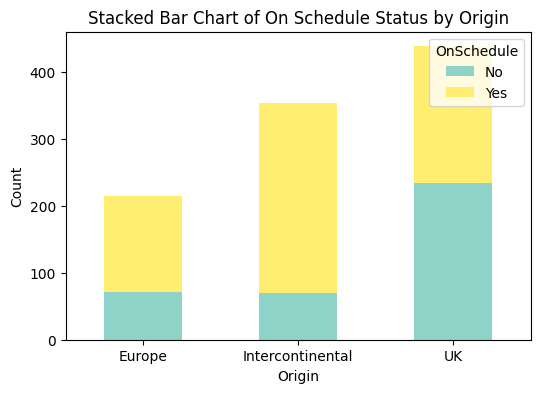

In [25]:
# # Sample DataFrame setup (Replace this with your actual data)
# ports_replacemissing = pd.read_csv("ports.csv")
# crosstab = pd.crosstab(ports_replacemissing['Origin'], ports_replacemissing['On Schedule Status'])

# # Plotting the stacked bar chart
# crosstab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set3')

# # Adding titles and labels
# plt.title('Stacked Bar Chart of On Schedule Status by Origin')
# plt.xlabel('Origin')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally
# plt.legend(title='On Schedule', loc='upper right')

# # Show the plot
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ports_replacemissing = pd.read_csv("ports.csv")

# Print the column names to identify the correct ones
print(ports_replacemissing.columns)

# Ensure you replace 'YourOriginColumnName' and 'YourOnScheduleStatusColumnName'
# with the actual column names printed from the previous line.
crosstab = pd.crosstab(ports_replacemissing['origin'], ports_replacemissing['onSchedule'])

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set3')

# Adding titles and labels
plt.title('Stacked Bar Chart of On Schedule Status by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='OnSchedule', loc='upper right')
plt.show()



The stacked bar chart illustrates the distribution of on-schedule versus not-on-schedule statuses across ship origins. Notably, more intercontinental ships adhere to their schedules than those from the UK and Europe. The UK has the highest count of not on-schedule instances. This visual suggests regional differences in scheduling reliability, with intercontinental routes showing better schedule adherence, possibly due to various operational, logistical, or geographical factors. The chart effectively displays the comparative breakdown and can prompt a more detailed analysis of the causes behind these scheduling trends.

In other stacked bar charts, group bar chart is also used to visual methods the cross-tabulation data for categorical variables. This displays the categories of one variable grouped side by side for each category of the other variable. It helps compare the categories directly with each other.

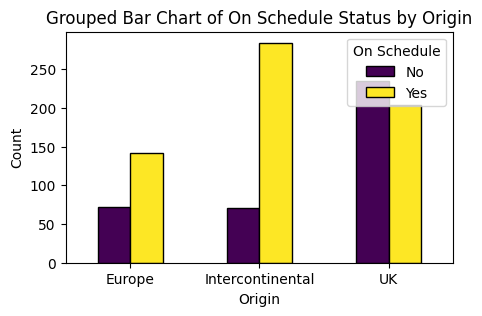

In [26]:
# Plotting the grouped bar chart
crosstab.plot(kind='bar', figsize=(5, 3), colormap='viridis', edgecolor='black')

# Adding titles and labels
plt.title('Grouped Bar Chart of On Schedule Status by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally
plt.legend(title='On Schedule', loc='upper right')

# Show the plot
plt.show()

The grouped bar chart delineates the on-schedule status of ships from different origins. It visibly highlights that UK-origin ships have a near-equal distribution of on-schedule and not on-schedule statuses. In contrast, ships from Intercontinental and European origins are predominantly on schedule, with Europe showing the highest adherence. The distinction between the origins suggests that operational practices or logistical challenges specific to the UK may impact scheduling reliability. This visual comparison underscores the importance of investigating regional differences to enhance on-time performance.